# Etape 1 : Nettoyage de données

In [277]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

In [278]:
raw_data=pd.read_csv("kc_house_data.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## 1.Nettoyage et transformation des données

On obsèrve dans notre jeu de de données que les dates ont un format qui ne nous convient pas, on va les transformer en format date.

In [279]:
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


On regarde si notre jeu de données contient des null ou des valeurs manquantes.


In [280]:
print(raw_data.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


On liste notre jeu de données pour regarder la pertinence de nos paramètres et par la suite observer si il y'a des valeurs aberrantes qu'on pourrait enlever.

In [281]:
raw_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


La première chose qui nous vient à l'oeil , c'est une maison qui contient 33 chambres qu'on pourrait enlever , on pourrait également convertir les données en sqft en sqm.
On remarque également la présence de valeurs décimales pour les salles de bains et les étages. 
Jouons avec nos données pour les nettoyer :

In [282]:
raw_data=raw_data[raw_data.bedrooms!=33]
raw_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161200e+04,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,1788.425319,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984
std,2.876594e+09,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,828.094487,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


On crée un dataframe qui aura ses catégories de surface en m2 et on changera par la suite le nom de ses colonnes.

In [283]:
df = raw_data.copy()
for index in df:
    if index in ['sqft_lot','sqft_lot15','sqft_living15','sqft_living','sqft_basement','sqft_above']:
        df[index]=df[index].apply(lambda x:x*(1/10.76)).round(0)
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,110.0,525.0,1.0,0,0,...,7,110.0,0.0,1955,0,98178,47.5112,-122.257,125.0,525.0
1,6414100192,2014-12-09,538000.0,3,2.25,239.0,673.0,2.0,0,0,...,7,202.0,37.0,1951,1991,98125,47.7210,-122.319,157.0,710.0
2,5631500400,2015-02-25,180000.0,2,1.00,72.0,929.0,1.0,0,0,...,6,72.0,0.0,1933,0,98028,47.7379,-122.233,253.0,749.0
3,2487200875,2014-12-09,604000.0,4,3.00,182.0,465.0,1.0,0,0,...,7,98.0,85.0,1965,0,98136,47.5208,-122.393,126.0,465.0
4,1954400510,2015-02-18,510000.0,3,2.00,156.0,751.0,1.0,0,0,...,8,156.0,0.0,1987,0,98074,47.6168,-122.045,167.0,697.0


In [284]:
df.columns =['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqm_living',
       'sqm_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqm_above', 'sqm_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqm_living15', 'sqm_lot15']
df.head()

,id,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,...,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zipcode,lat,long,sqm_living15,sqm_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,110.0,525.0,1.0,0,0,...,7,110.0,0.0,1955,0,98178,47.5112,-122.257,125.0,525.0
1,6414100192,2014-12-09,538000.0,3,2.25,239.0,673.0,2.0,0,0,...,7,202.0,37.0,1951,1991,98125,47.7210,-122.319,157.0,710.0
2,5631500400,2015-02-25,180000.0,2,1.00,72.0,929.0,1.0,0,0,...,6,72.0,0.0,1933,0,98028,47.7379,-122.233,253.0,749.0
3,2487200875,2014-12-09,604000.0,4,3.00,182.0,465.0,1.0,0,0,...,7,98.0,85.0,1965,0,98136,47.5208,-122.393,126.0,465.0
4,1954400510,2015-02-18,510000.0,3,2.00,156.0,751.0,1.0,0,0,...,8,156.0,0.0,1987,0,98074,47.6168,-122.045,167.0,697.0


On regarde le nombre d'id uniques.

In [285]:
df.id.nunique()

21435

In [286]:
dataframes = df[df.duplicated('id') | df.duplicated('id', keep="last")]
dataframes

,id,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,...,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zipcode,lat,long,sqm_living15,sqm_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,147.0,465.0,1.0,0,0,...,8,120.0,27.0,1939,0,98117,47.6870,-122.386,146.0,418.0
94,6021501535,2014-12-23,700000.0,3,1.50,147.0,465.0,1.0,0,0,...,8,120.0,27.0,1939,0,98117,47.6870,-122.386,146.0,418.0
313,4139480200,2014-06-18,1384000.0,4,3.25,399.0,1125.0,1.0,0,3,...,11,250.0,149.0,1997,0,98006,47.5503,-122.102,359.0,1045.0
314,4139480200,2014-12-09,1400000.0,4,3.25,399.0,1125.0,1.0,0,3,...,11,250.0,149.0,1997,0,98006,47.5503,-122.102,359.0,1045.0
324,7520000520,2014-09-05,232000.0,2,1.00,115.0,1124.0,1.0,0,0,...,6,89.0,26.0,1922,1984,98146,47.4957,-122.352,169.0,693.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,4,2.50,249.0,515.0,2.0,0,0,...,8,249.0,0.0,2013,0,98045,47.4759,-121.734,249.0,557.0
20779,6300000226,2014-06-26,240000.0,4,1.00,112.0,202.0,1.5,0,0,...,7,112.0,0.0,1933,0,98133,47.7076,-122.342,105.0,149.0
20780,6300000226,2015-05-04,380000.0,4,1.00,112.0,202.0,1.5,0,0,...,7,112.0,0.0,1933,0,98133,47.7076,-122.342,105.0,149.0
21580,7853420110,2014-10-03,594866.0,3,3.00,258.0,558.0,2.0,0,0,...,9,258.0,0.0,2013,0,98065,47.5184,-121.886,265.0,558.0


On remarque qu'il y'a 353 données qui ont la même id tout simplement parce qu'il y'a une hausse du prix de la maison au cours du temps, pour avoir une estimation précise de la valeur sur le marché on va garder celles les plus récentes.

In [287]:
df = df.drop_duplicates("id", keep="last")

In [288]:
oui=df[df.id==6021501535]
oui

,id,date,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,...,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zipcode,lat,long,sqm_living15,sqm_lot15
94,6021501535,2014-12-23,700000.0,3,1.5,147.0,465.0,1.0,0,0,...,8,120.0,27.0,1939,0,98117,47.687,-122.386,146.0,418.0


Maintenant qu'on a épurer nos données en fonction de la date et l'id ,elles ne sont désormais plus importantes ce ne sont pas des données pertinente pour notre analyse on va les enlever mais avant toute choses on pourrait les utiliser pour convertir certaines de nos données : 
par exemple on peut obtenir l'age de notre maison et remplacer l'année de rénovation par une case qui indique si la maison a été rénové.

In [289]:
df["house_age"] = df["date"].dt.year - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

df=df.drop('date', axis=1)
df=df.drop('yr_renovated', axis=1)
df=df.drop('yr_built', axis=1)
df=df.drop("id",axis=1)
df.head(5)


,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,zipcode,lat,long,sqm_living15,sqm_lot15,house_age,renovated
0,221900.0,3,1.00,110.0,525.0,1.0,0,0,3,7,110.0,0.0,98178,47.5112,-122.257,125.0,525.0,59,0
1,538000.0,3,2.25,239.0,673.0,2.0,0,0,3,7,202.0,37.0,98125,47.7210,-122.319,157.0,710.0,63,1
2,180000.0,2,1.00,72.0,929.0,1.0,0,0,3,6,72.0,0.0,98028,47.7379,-122.233,253.0,749.0,82,0
3,604000.0,4,3.00,182.0,465.0,1.0,0,0,5,7,98.0,85.0,98136,47.5208,-122.393,126.0,465.0,49,0
4,510000.0,3,2.00,156.0,751.0,1.0,0,0,3,8,156.0,0.0,98074,47.6168,-122.045,167.0,697.0,28,0


In [290]:
df[df.house_age ==-1]

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,zipcode,lat,long,sqm_living15,sqm_lot15,house_age,renovated
1763,597326.0,4,4.00,332.0,767.0,2.0,0,0,3,10,266.0,66.0,98040,47.5784,-122.226,207.0,929.0,-1,0
2687,385195.0,1,1.00,66.0,558.0,1.5,0,0,3,6,66.0,0.0,98144,47.5756,-122.316,134.0,446.0,-1,0
7526,614285.0,5,2.75,254.0,595.0,2.0,0,0,3,8,254.0,0.0,98072,47.7685,-122.160,234.0,569.0,-1,0
8039,455000.0,2,1.50,112.0,117.0,2.0,0,0,3,8,93.0,19.0,98144,47.6001,-122.298,123.0,172.0,-1,0
14489,500000.0,2,2.25,146.0,118.0,2.0,0,0,3,9,119.0,27.0,98199,47.6514,-122.385,146.0,558.0,-1,0
17098,350000.0,3,2.00,128.0,335.0,3.0,0,0,3,8,128.0,0.0,98122,47.6074,-122.305,138.0,335.0,-1,0
19805,455000.0,3,1.75,123.0,94.0,3.0,0,0,3,9,123.0,0.0,98122,47.6047,-122.305,128.0,139.0,-1,0
20770,357000.0,5,2.50,278.0,859.0,2.0,0,0,3,8,278.0,0.0,98133,47.7384,-122.348,183.0,1683.0,-1,0
20852,595000.0,4,3.25,347.0,424.0,2.0,0,0,3,9,257.0,90.0,98103,47.6725,-122.330,167.0,424.0,-1,0
20963,230000.0,3,1.50,97.0,117.0,2.0,0,0,3,9,84.0,13.0,98144,47.5951,-122.301,125.0,279.0,-1,0


On a des maisons qui ont été construit après avoir été vendu ce sont des données inconcevables qu'on va enlever.

In [291]:
df = df[df.house_age != -1]

In [292]:
df["bedrooms"].value_counts()
df=df[df.bedrooms!=0]
df.head()

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,zipcode,lat,long,sqm_living15,sqm_lot15,house_age,renovated
0,221900.0,3,1.00,110.0,525.0,1.0,0,0,3,7,110.0,0.0,98178,47.5112,-122.257,125.0,525.0,59,0
1,538000.0,3,2.25,239.0,673.0,2.0,0,0,3,7,202.0,37.0,98125,47.7210,-122.319,157.0,710.0,63,1
2,180000.0,2,1.00,72.0,929.0,1.0,0,0,3,6,72.0,0.0,98028,47.7379,-122.233,253.0,749.0,82,0
3,604000.0,4,3.00,182.0,465.0,1.0,0,0,5,7,98.0,85.0,98136,47.5208,-122.393,126.0,465.0,49,0
4,510000.0,3,2.00,156.0,751.0,1.0,0,0,3,8,156.0,0.0,98074,47.6168,-122.045,167.0,697.0,28,0


In [293]:
df.bathrooms

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21410, dtype: float64

On remarque que certaines maison ne possède qu'un lavabo et des toilettes ou seulement un lavabo , on va partir du principe que ces valeurs sont aberrantes (surface très grande avec 1 seul lavabo ou seulement des toilettes )et on va les enlever de notre dataset.

In [294]:
df["bathrooms"].value_counts()
df=df[df.bathrooms >0.75]
df.head()


,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,zipcode,lat,long,sqm_living15,sqm_lot15,house_age,renovated
0,221900.0,3,1.00,110.0,525.0,1.0,0,0,3,7,110.0,0.0,98178,47.5112,-122.257,125.0,525.0,59,0
1,538000.0,3,2.25,239.0,673.0,2.0,0,0,3,7,202.0,37.0,98125,47.7210,-122.319,157.0,710.0,63,1
2,180000.0,2,1.00,72.0,929.0,1.0,0,0,3,6,72.0,0.0,98028,47.7379,-122.233,253.0,749.0,82,0
3,604000.0,4,3.00,182.0,465.0,1.0,0,0,5,7,98.0,85.0,98136,47.5208,-122.393,126.0,465.0,49,0
4,510000.0,3,2.00,156.0,751.0,1.0,0,0,3,8,156.0,0.0,98074,47.6168,-122.045,167.0,697.0,28,0


# 2.Correlation de nos données au modèle cherché.

Maintenant que notre jeu de données est assez clean, on va essayé d'extraire les données qui vont servir à notre modèle pour cela, on va s'aider du taux de corrélation et ainsi regarder la pertinence des données par rapport au modèle qu'on veut avoir.

Avant de chercher le taux correlation de nos données, on doit regarder certains paramètres en histogrammes pour comprendre leurs distributions/repartitions.

<AxesSubplot:xlabel='sqm_living', ylabel='Count'>

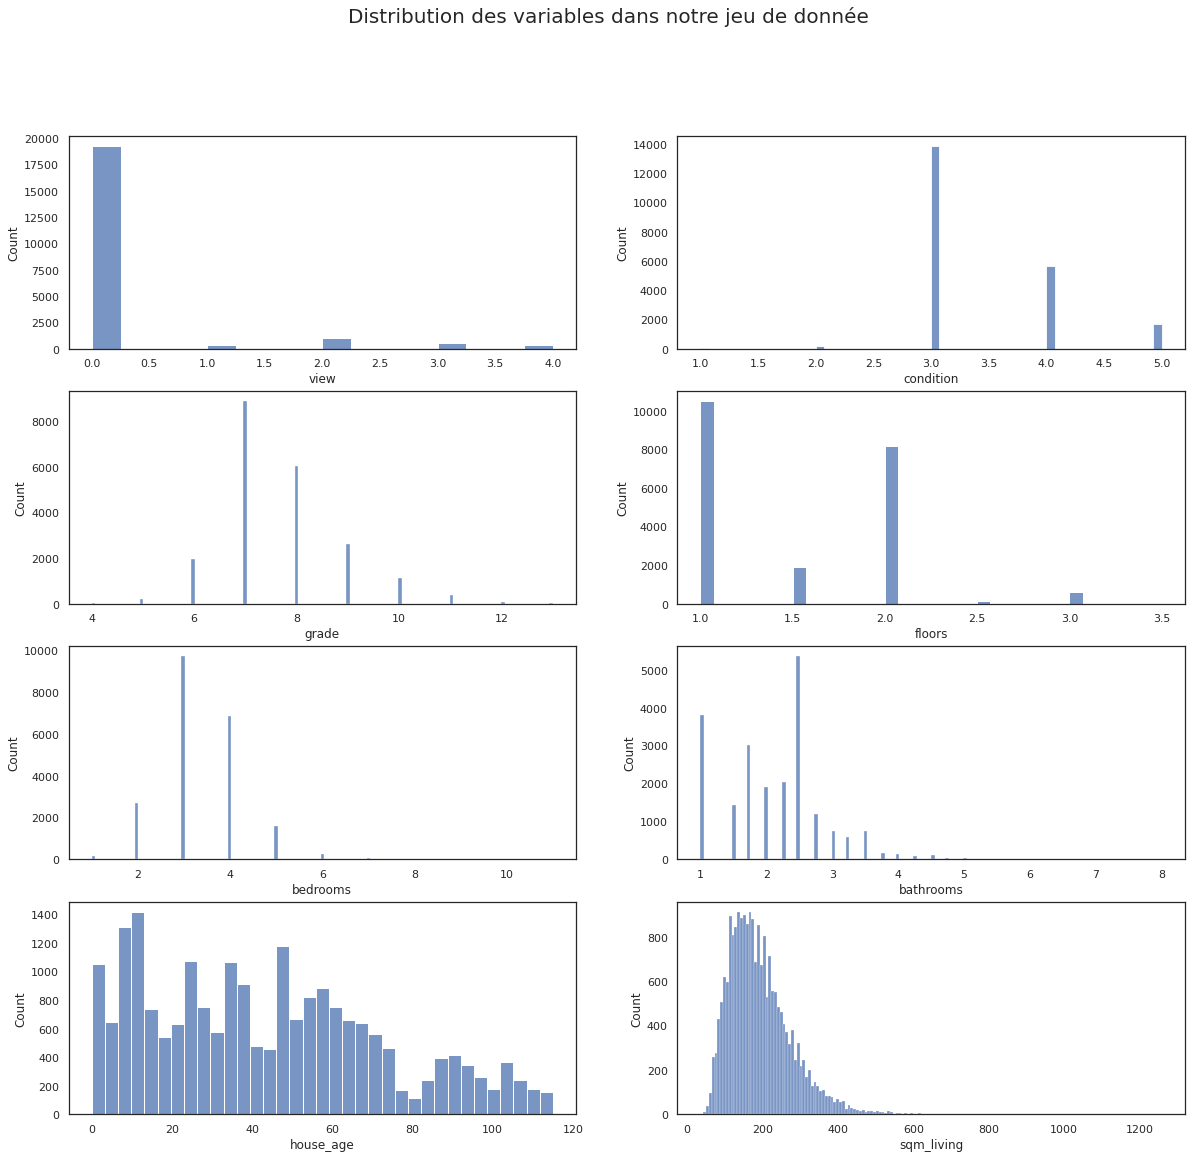

In [295]:
fig, ax =plt.subplots(4,2,figsize=(20,18))
plt.suptitle("Distribution des variables dans notre jeu de donnée",fontsize =20)
sns.histplot(ax=ax[0,0],x="view",data=df)
sns.histplot(ax=ax[0,1],x="condition",data=df)
sns.histplot(ax=ax[1,0],x="grade",data=df)
sns.histplot(ax=ax[1,1],x="floors",data=df)
sns.histplot(ax=ax[2,0],x="bedrooms",data=df)
sns.histplot(ax=ax[2,1],x="bathrooms",data=df)
sns.histplot(ax=ax[3,0],x="house_age",data=df)
sns.histplot(ax=ax[3,1],x="sqm_living",data=df)



# 2.1 Taux de correlation

<AxesSubplot:>

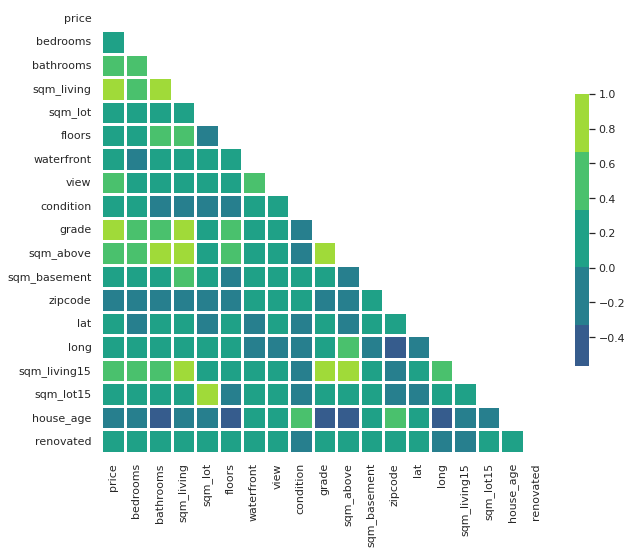

In [296]:
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(corr)
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("viridis")

sns.heatmap(corr, 
            mask=mask, 

            cmap=cmap, 
            vmax=1, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )

On a obtenu une matrice des taux de correlations ce qui nous interesse c'est seulement le taux de correlations avec le prix.

<AxesSubplot:>

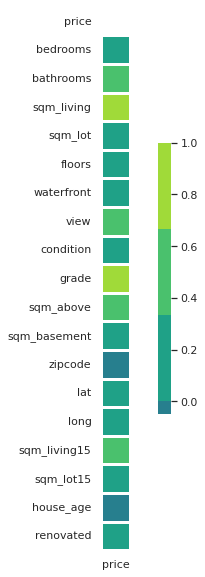

In [297]:
sns.set_theme(style="white")
corr = df.corr()[["price"]]
mask = np.triu(corr)
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("viridis")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )

In [298]:
df[df.columns[0:]].corr()['price'].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqm_living,0.701268
grade,0.667756
sqm_above,0.603945
sqm_living15,0.583420
bathrooms,0.524639
view,0.398103
sqm_basement,0.323258
bedrooms,0.315316
lat,0.306937


Pour mieux comprendre ces taux de corrélations , on peut les visualiser avec des graphiques.

# 2.2 Comparatif taux de correlation et graphique de la variable choisi en fonction du prix

### Prenons un échantillon de variables et analysons les.

price / bedrooms


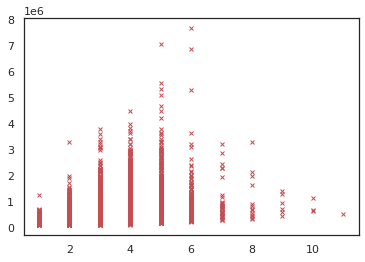

price / bathrooms


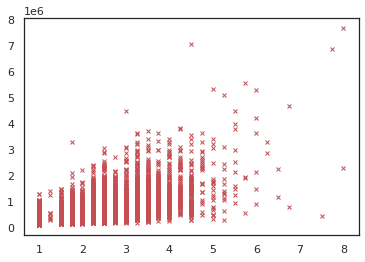

price / sqm_living


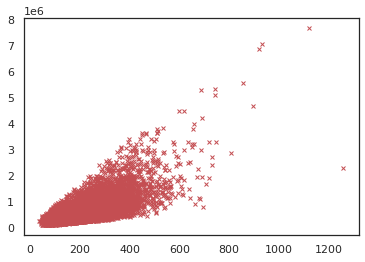

price / waterfront


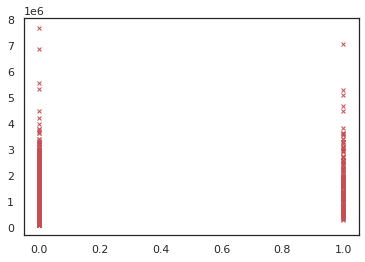

price / view


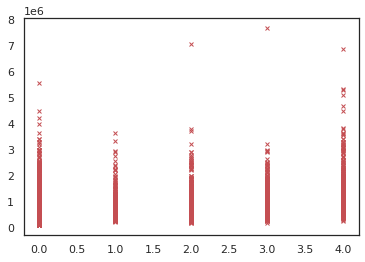

price / grade


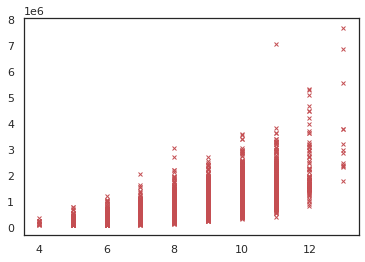

price / sqm_above


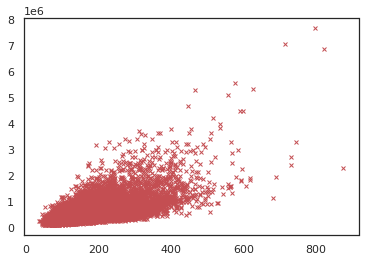

price / zipcode


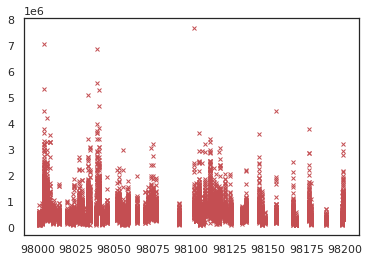

price / sqm_living15


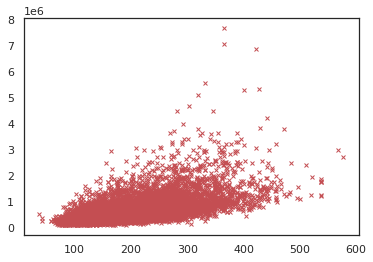

price / house_age


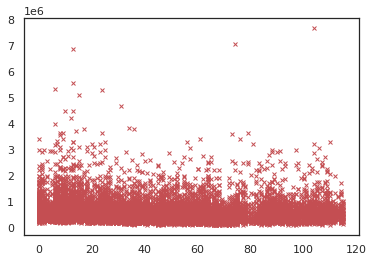

price / renovated


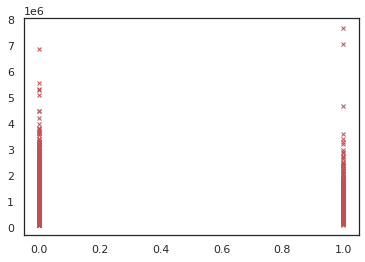

In [299]:
for index in df:
    if index in ["sqm_living", "grade", "sqm_above", "sqm_living15", "bathrooms", "view", "bedrooms","house_age","zipcode","renovated","waterfront"]:
        print("price / " + index)
        plt.plot(df[index], df['price'], 'rx', markersize=4)
        plt.show()

# 2.2.1 Variables 

### La plupart de nos données ont une distribution linéaire,gaussienne certains cas sont particulier , regardons les :

### On note Taux de correlation Tc:


# 2.2.1.A Variables quantitatives

### Avec les histogrammes précèdent , on a pu obtenir une distribution de nos variables et ainsi les catégoriser : les variables quantitatives et les variables qualitatives. Dans cette première partie on va s'intéresser à la première catégorie:

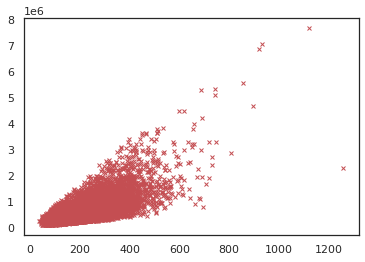

In [300]:
plt.plot(df["sqm_living"], df['price'], 'rx', markersize=4)
plt.show()

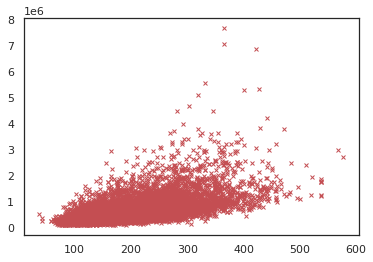

In [301]:
plt.plot(df["sqm_living15"], df['price'], 'rx', markersize=4)
plt.show()

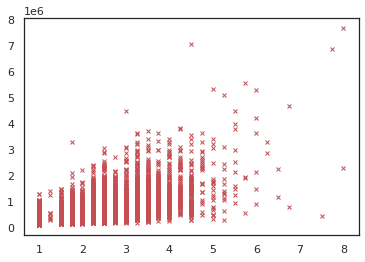

In [302]:
plt.plot(df["bathrooms"], df['price'], 'rx', markersize=4)
plt.show()

Pour les 3 graphiques ci-dessus on peut remarque une certaine linéarité des résultats plus la variable augmente plus le prix augmente.(Tc_sqm_living=0.701013    Tc_grade= 0.667444 Tc_bathrooms = 0.524497 Tc_sqm_living15 = 0.315195)




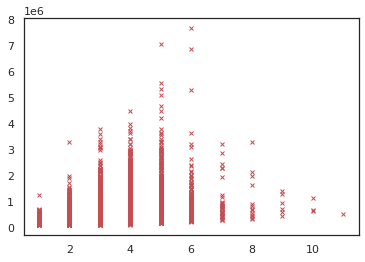

In [303]:
plt.plot(df["bedrooms"], df['price'], 'rx', markersize=4)
plt.show()

Tc_bedrooms=0.315195 la forme de cette est plutôt gaussienne , il peut sembler étrange que le prix de certaines maisons n'augmentent pas alors que le nombre de chambres augmentent , d'où le taux de correlation a 0.31

# 2.2.1.B Variables qualitatives

### Il n'est pas pertinent d'analyser cette catégorie de données avec un graphique du prix en fonction de la variable choisi , en effet la plupart de ces variables sont soit nominales soit booléennes, il nous faut chercher une autre méthode :

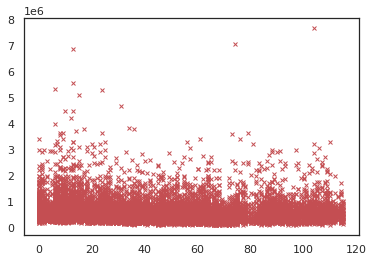

In [304]:
plt.plot(df["house_age"], df['price'], 'rx', markersize=4)
plt.show()

Tc_house_age = -0.05
On remarque par exemple que l'âge des maisons n'ont pas vraiment d'importances sur notre jeu de données , bien sûr on voit que certaines maisons jeunes ont des prix élevé mais dans la globalité ce paramètre n'impacte pas assez fortement le prix de la maison, ce graphique ne nous permet pas de voir l'importance de cette variable

In [305]:
df["house_age"]= np.where(df['house_age'].between(0,20), 0, df['house_age'])
df["house_age"]= np.where(df['house_age'].between(20,40), 1, df['house_age'])
df["house_age"]= np.where(df['house_age'].between(40,60), 2, df['house_age'])
df["house_age"]= np.where(df['house_age'].between(60,80), 3, df['house_age'])
df["house_age"]= np.where(df['house_age'].between(80,100), 4, df['house_age'])
df["house_age"]= np.where(df['house_age'].between(100,115), 5, df['house_age'])


In [306]:
h = df[df.house_age==0]
h1 = df[df.house_age==1]
h2 = df[df.house_age==2]
h3 = df[df.house_age==3]
h4 = df[df.house_age==4]
h5 = df[df.house_age==5]

In [307]:
h_mean=h.price.mean()
h1_mean=h1.price.mean()
h2_mean=h2.price.mean()
h3_mean=h3.price.mean()
h4_mean=h4.price.mean()
h5_mean=h5.price.mean()

In [308]:
liste_h=[[0,1,2,3,4,5]]
liste_hmean=[[h_mean,h1_mean,h2_mean,h3_mean,h4_mean,h5_mean]]

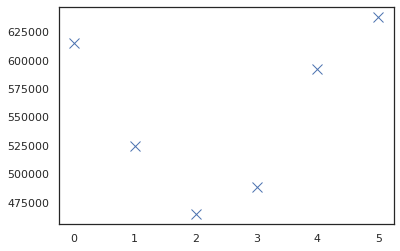

In [309]:
plt.plot(liste_h,liste_hmean,"bx",markersize=10)
plt.show()

On obtient une parabole y'a une certaine linéarité pour les maison agées entre 0 et 40 et 80 et 115.

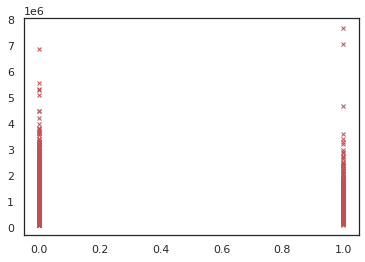

In [310]:
plt.plot(df["renovated"], df['price'], 'rx', markersize=4)
plt.show()

Pour regarder en si cette variable est correler au prix on peut tout simplement comparer le prix moyen des maison rénovées(qu'on nommera Maison R) et celle qui ne le sont pas.

In [311]:
tajine = df[df.renovated==0 ]
tajine2 = df[df.renovated==1 ]
tajine_poulet =tajine.price.mean()
tajine_poulet2=tajine2.price.mean()
tajine_poulet #prix moyen des maison qui ne sont pas rénovés


532843.4087237479

In [312]:
tajine_poulet2

764083.8112582781

Le prix moyen des maisons R est de 764083 dollar et pour celui des maisons non R est de 523803. Cette variable est bien correlé au prix.
Tc_renovated =0.126848

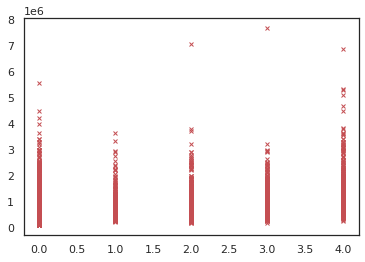

In [313]:
plt.plot(df["view"], df['price'], 'rx', markersize=4)
plt.show()

Tc_view = 0.39 
Sa correlation est plutôt bonne néanmoins ,en regardant notre graphique on remarque que sa distribution n'est pas linéaire on retrouve des maisons qui ont des prix équivalentes pourtant elles ont une meilleure vue. Ce graphique ne nous permet pas de comprendre complètement le taux de correlation. Nous allons faire un graphique en fonction des prix moyens pour chaques view :


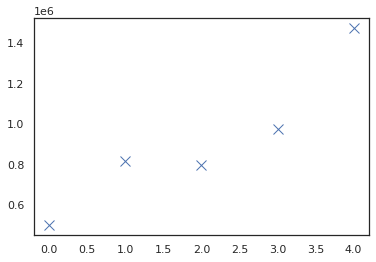

In [314]:
couscous0 = df[df.view==0 ]
couscous = df[df.view==1 ]
couscous2 = df[df.view==2 ]
couscous4 =  df[df.view==4]
couscous3 = df[df.view==3 ]
a= couscous0.price.mean()
b =couscous.price.mean()
c = couscous2.price.mean()
d= couscous3.price.mean()
e = couscous4.price.mean()
liste = []
liste_view = []
liste_view.append([0,1,2,3,4])
liste.append([a,b,c,d,e])
plt.plot(liste_view,liste,"bx",markersize=10)
plt.show()

Parfait on peut voir que nos points suivent une trajectoire progressive en fonction de leur note de vue.

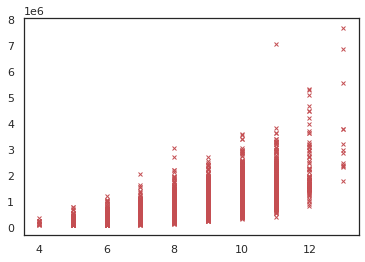

In [315]:
plt.plot(df["grade"], df['price'], 'rx', markersize=4)
plt.show()

Tc_grade=0.667444 Cette variable a un taux de correlation très haut et son graphique nous montre une augmentation nette et claire , plus la note de la maison est grande plus son prix augmente, c'est une variable qualitatif ordinale.

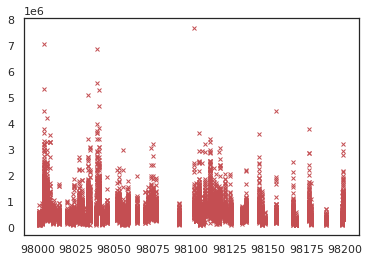

In [316]:
plt.plot(df["zipcode"], df['price'], 'rx', markersize=4)
plt.show()

Tc_zipcode = -0.05 Faire un graphique du prix en fonction de son zipcode à du sens , on essaye de correler le prix d'une maison à sa localisation ,en effet dans ce graphique on remarque une certaine homogénéité dans certains zipdcodes, mais il est difficile d'analyser cette donnée avec un graphique seul, on va pour cela établir une heatmap de ses zipcodes en fonction du prix.

In [317]:

import plotly.graph_objects as go

import pandas as pd


fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['long'],
        lat = df['lat'],
        text= df['zipcode'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            
            colorscale = [
                [0, "rgb(0, 138, 244)"],
                [0.08, "rgb(0, 138, 244)"],
                [0.1, "rgb(108,0, 0)"],
                [0.2, "rgb(108,0, 0)"],
                [0.3, "rgb(108, 0, 0)"],
                [0.4, "rgb(108, 0, 0)"],
                [0.5, "rgb(108, 0, 0)"],
                [0.6, "rgb(108, 0, 0)"],
                [0.7, "rgb(108, 0, 0)"],
                [0.8, "rgb(108, 0, 0)"],
                [0.9, "rgb(108, 0, 0)"],
                [1.0, "rgb(108, 0, 0)"],
                
                  ],
           
            color = df['price'],
           
            colorbar_title="Prix de l'immobilier"
        )))
fig.update_geos(fitbounds="locations")
fig.update_layout(
        title = "Prix de l'immobilier dans l'état de Washington",
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1,
            subunitwidth = 1
        ),
    )
fig.show()

Utiliser le taux de correlation du zipcode n'a aucun sens puisque cette donnée est qualitative. En s'aidant de cette carte on a pu dégager des zipcodes qui ont un prix au dessus du marché (98004,98005,98006,98033,98039,98040,98105,98112).
La carte ci_dessus nous permet de comprendre la répartition globale du prix du marché dans l'état de Washington, on a bien une correlation du prix en fonction de la localisation.  


In [318]:
# zipcode = [98004,98005,98006,98033,98039,98040,98105,98112]
# # df.loc[~df['zipcode'].isin([zipcode]), 'zipcode'] = '0'
# df

In [319]:
df=df.drop("lat",axis=1)

In [320]:

df=df.drop("long",axis=1)

In [321]:
df=df.astype(int)

In [322]:
df.to_csv("cleared_data.csv",encoding='utf-8',index=False)